In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/CVR/Downloads/time_dist_data.csv')
df

,Time,Distance
0,5,60
1,6,87
2,3,65
3,12,43
4,21,23
5,22,67
6,6,89
7,12,57
8,24,34
9,28,87


In [6]:
df.dtypes

Time        int64
Distance    int64
dtype: object

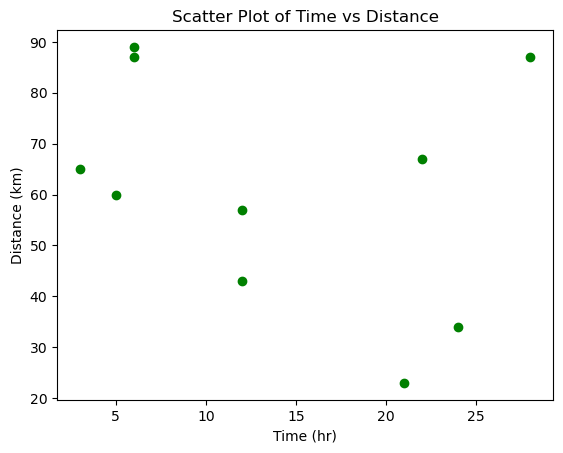

In [7]:
##Scatter plot
plt.scatter(df['Time'], df['Distance'], color='green')
plt.xlabel("Time (hr)")
plt.ylabel("Distance (km)")
plt.title("Scatter Plot of Time vs Distance")
plt.show()

In [8]:
df.corr()

,Time,Distance
Time,1.000000,-0.291793
Distance,-0.291793,1.000000


C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


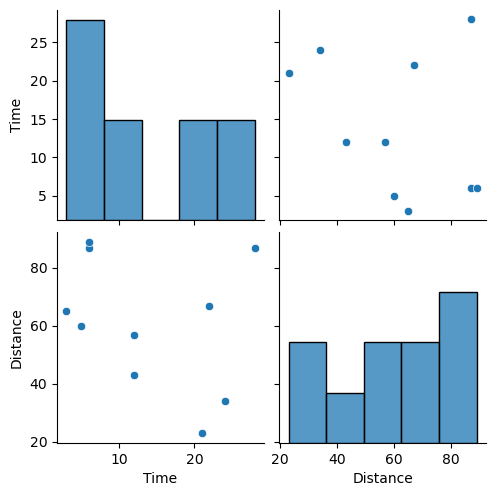

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
## Independent features
x=df[['Time']]  #Independent feature should be in the form of dataframe or 2D array-add 2 square brackets
type(x)

pandas.core.frame.DataFrame

In [11]:
np.array(x).shape

(10, 1)

In [12]:
## Dependent features
y=df['Distance']  #Dependent feature should be in the form of series or 1D array-add 1 square bracket
type(y)

pandas.core.series.Series

In [13]:
## Train_test_split
from sklearn import model_selection
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)  
## test_size=0.25 --> 25% of data is allocated for testing and 75% for training
## random_state=42 --> the same random split will be generated every time you run the code. If you don’t set random_state, each execution will produce a different split.

In [14]:
## fit-transform for training data
## transform for test data

In [15]:
##sklearn --> data preprocessing, model training, evaluation, 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
## Each column now has mean = 0 and standard deviation = 1.

array([[-0.8774575 ],
       [-0.05062255],
       [-1.11369606],
       [ 1.83928591],
       [ 1.01245096],
       [-0.05062255],
       [-0.75933822]])

In [16]:
x_test = scaler.transform(x_test)
x_test

array([[ 1.3668088 ],
       [-0.75933822],
       [ 1.13057024]])

In [17]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)
regression.fit(x_train,y_train)

## n_jobs=-1 --> The model will use all available CPU cores for computation. Increases speed when using large datasets.

LinearRegression(n_jobs=-1)

In [18]:
print("Coefficient:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient: [-0.24259681]
Intercept: 63.58656036446469


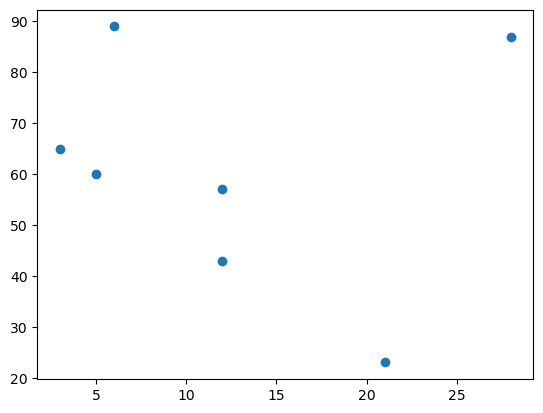

In [19]:
## plot Training data plot best fit line
scatter = plt.scatter(x_train,y_train)
plt.show(scatter)

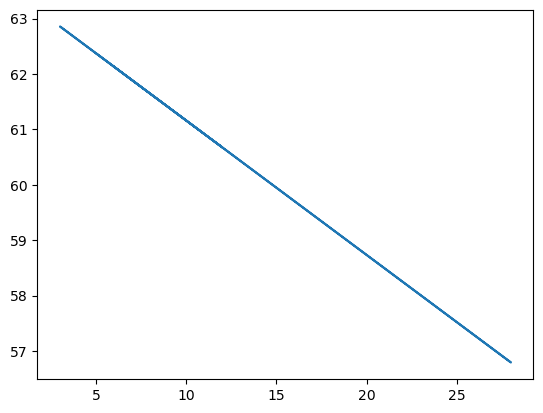

In [20]:
slope_of_best_fit = plt.plot(x_train,regression.predict(x_train))
plt.show(slope_of_best_fit)